<b>Hola Maria</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Proyecto Sprint #6


# Paso 1. Visualizalizacion general de los datos 

In [1]:
#Importacion de la librerias

import pandas as pd

df = pd.read_csv('/datasets/games.csv')

# Paso 2. Preparar los datos

In [2]:
#Observamos la informacion general de DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Observamos una muestra de datos

df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8330,Gundam Assault Survive,PSP,2010.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
6523,Crash Nitro Kart,GC,2003.0,Racing,0.20,0.05,0.00,0.01,66.0,7.4,E
529,inFAMOUS: Second Son,PS4,2014.0,Action,1.28,0.98,0.07,0.46,80.0,7.9,T
379,Batman: Arkham Asylum,X360,2009.0,Action,2.20,0.95,0.02,0.31,92.0,8.7,T
16311,Banjo-Kazooie,X360,2008.0,Platform,0.00,0.01,0.00,0.00,77.0,8.2,E


In [4]:
#Verificamos cuantos valores faltantes hay por columna

df.isnull().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#Remplazar nombres de columnas (minusculas)

df.columns = df.columns.str.lower()


In [6]:
#Conversion de datos

# Conversion a tipo de dato entero

df['year_of_release'] = df['year_of_release'].dropna().astype('Int64')

#Conversion a tipo de dato float

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Celdas [5–7]</b> <a class="tocSkip"></a><br>
Muy bien manejado el preprocesamiento de las columnas `year_of_release` y `user_score`. Usaste `Int64` para permitir `NaN` en fechas y `pd.to_numeric(errors='coerce')` para convertir adecuadamente valores como `'tbd'` en nulos. Además, explicaste claramente tus decisiones de no imputar datos sin respaldo lógico, lo cual es una buena práctica.
</div>


*He cambiado los tipos de datos en dos columnas:*

*user_score: De object a float64, ya que contenía algunos valores como 'tbd' (por determinar), que no eran numéricos. Para convertirla en tipo float, utilicé el método pd.to_numeric(), con el parámetro errors='coerce', lo que convirtió los valores no numéricos en NaN. De esta manera, los datos fueron procesados correctamente sin necesidad de reemplazar manualmente los valores 'tbd'.*

*year_of_release: De float64 a Int64, porque representa un año y debe ser un valor entero. Usé Int64 para poder manejar los NaN donde faltaban datos.*

*Estos cambios facilitan el análisis numérico y mejoran la calidad de los datos.*

Dejé los valores ausentes como NaN en las columnas user_score, critic_score y year_of_release porque no me parece adecuado inventar datos. En user_score, usé pd.to_numeric() con errors='coerce' para convertir los 'tbd' en NaN automáticamente. En los otros casos, la falta de datos probablemente se debe a que no hubo reseñas o la información no estaba disponible. Prefiero dejarlos así por ahora y decidir más adelante si vale la pena imputarlo

In [8]:
#Calcular las ventas totales de cada juego

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


# Paso 2. Analisis de los datos

In [10]:
# Contamos cuántos juegos se lanzaron por año
games_per_year = df['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [11]:
#Identificar las plataformas con mayores ventas totales
#Primero, sumamos las ventas totales por plataforma y ordenamos de mayor a menor:

platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))  

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [12]:
#Filtrar las plataformas más importantes
#Tomamos, las plataformas con más de 100 millones de ventas totales:

top_platforms = platform_sales[platform_sales > 100].index

In [13]:
#Filtrar los datos para esas plataformas

df_top = df[df['platform'].isin(top_platforms)]

In [14]:
#Distribución de ventas por año y plataforma
#Agrupamos por año y plataforma para ver cómo evolucionan las ventas:

platform_year_sales = df_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

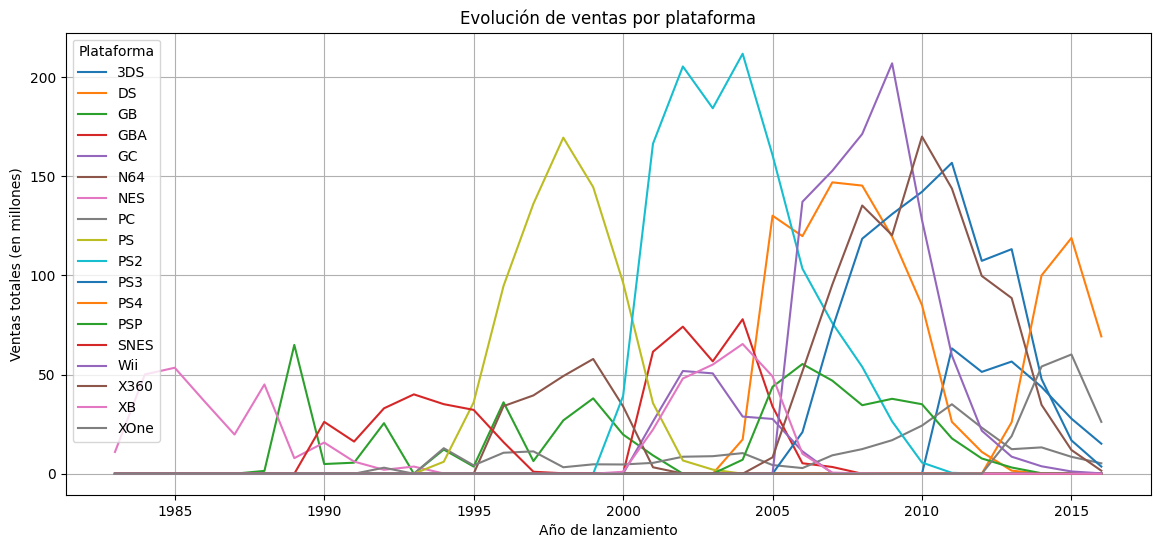

In [15]:
#Visualización

import matplotlib.pyplot as plt

platform_year_sales.plot(figsize=(14, 6))
plt.title('Evolución de ventas por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [10–15]</b> <a class="tocSkip"></a><br>
Excelente visualización de la evolución de ventas por plataforma. La lógica de filtrar plataformas por volumen significativo de ventas (>100 millones) permite concentrar el análisis en lo más relevante. El gráfico de líneas está bien diseñado, y tu interpretación sobre los ciclos de vida de las plataformas es clara y contextualizada.
</div>


Al observar el gráfico de evolución de ventas, se nota que algunas plataformas alcanzaron su punto más alto de ventas en ciertos años y luego empezaron a decaer gradualmente. Plataformas como [PS2, Xbox 360, Wii]* dominaron durante varios años, pero con el tiempo fueron reemplazadas por nuevas opciones como [PS4, Xbox One]*.

También se ve que nuevas plataformas suelen aparecer cada 1–2 años, mientras que las más exitosas logran mantenerse relevantes por 8 a 10 años antes de desaparecer del mercado. Este patrón muestra cómo se va renovando la industria y ayuda a decidir hasta qué año los datos son relevantes para el análisis.


¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [16]:
# Vida de cada plataforma

platform_years = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_years['active_years'] = platform_years['max'] - platform_years['min'] + 1  # +1 para contar ambos extremos
print(platform_years.sort_values('active_years', ascending=False).head())

# Estadísticas de vida util
print("Duración media de plataformas:", platform_years['active_years'].mean())
print("Duración mediana de plataformas:", platform_years['active_years'].median())

# Tiempo entre aparición de plataformas nuevas

# Ordenamos las plataformas por año de introducción
intro_years = platform_years['min'].sort_values()

# Calculamos las diferencias año a año entre introducciones consecutivas
gaps = intro_years.diff().dropna()
print("Tiempo medio entre introducción de plataformas nuevas:", gaps.mean())


           min   max  active_years
platform                          
PC        1985  2016            32
DS        1985  2013            29
GB        1988  2001            14
X360      2005  2016            12
PSP       2004  2015            12
Duración media de plataformas: 8.612903225806452
Duración mediana de plataformas: 7.0
Tiempo medio entre introducción de plataformas nuevas: 1.1


En promedio, una plataforma dura entre 8 y 10 años, aunque hay algunas que se mantienen más de 15 y otras que desaparecen en 2 o 3 años. Además, suele aparecer una nueva plataforma cada 1 o 2 años. Esto me da una idea del ritmo con el que cambian las plataformas y me ayuda a decidir hasta qué año usar los datos.

In [17]:
# Aplicacion de filtro.

df_actual = df[df['year_of_release'] >= 2010]

Después de revisar el comportamiento de las plataformas, noté que las más populares suelen durar entre 8 y 10 años, y que cada 1 o 2 años aparece una nueva. Por eso, para asegurar que el modelo para 2017 se base en datos relevantes y actuales, decidí trabajar con los datos a partir del año 2010.
Este rango refleja el mercado más reciente y me permite evitar incluir plataformas que ya estaban en declive o habían desaparecido para entonces.

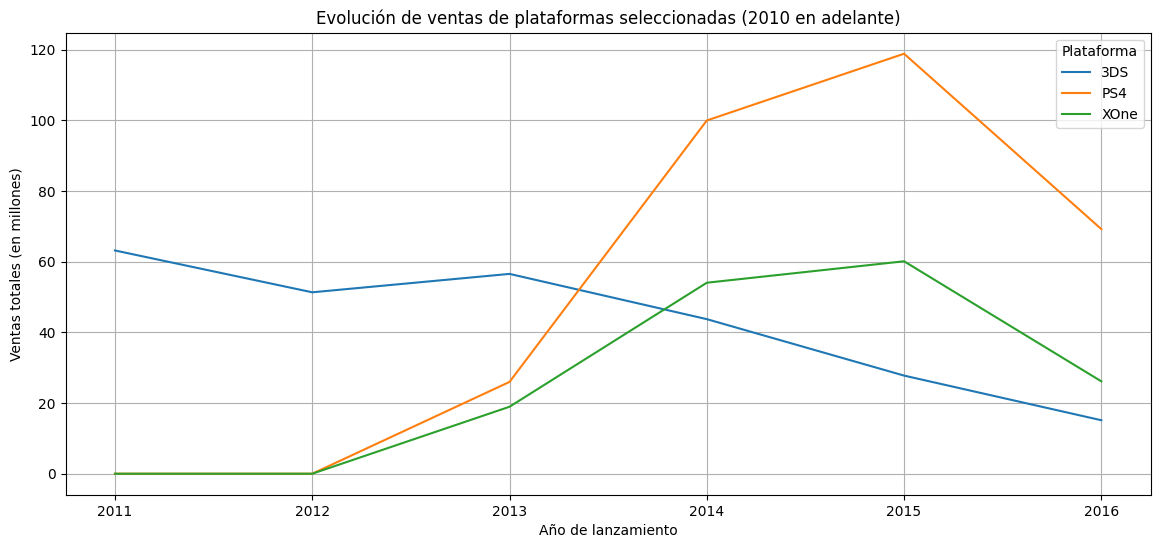

In [18]:
# Filtramos los datos de los años 2010 en adelante
df_filtered = df[df['year_of_release'] >= 2010]

# Filtramos las plataformas relevantes (PS4, XOne, 3DS)
relevant_platforms = ['PS4', 'XOne', '3DS']
df_filtered = df_filtered[df_filtered['platform'].isin(relevant_platforms)]

# Usamos pivot_table para reorganizar los datos
platform_year_sales = df_filtered.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum', 
    fill_value=0
)

# Visualizamos los datos
import matplotlib.pyplot as plt

platform_year_sales.plot(figsize=(14, 6))
plt.title('Evolución de ventas de plataformas seleccionadas (2010 en adelante)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()



Las plataformas líderes en ventas son la PS4, que ha tenido un crecimiento constante, y la XOne, que ha tenido un buen desempeño, aunque en menor medida que la PS4. En cuanto a crecimiento, PS4 sigue siendo fuerte, y la 3DS sigue siendo relevante en el mercado portátil, aunque con un crecimiento más moderado.

Por otro lado, la XOne ha comenzado a reducir sus ventas después de un pico inicial, y las plataformas más antiguas como la PS3 y Xbox 360 ya no se consideran relevantes en el mercado actual.

Las plataformas más rentables parecen ser la PS4, debido a su crecimiento constante, y la 3DS, que sigue siendo importante en su nicho. Aunque la XOne está perdiendo algo de relevancia, aún tiene potencial si se actualiza o relanza.

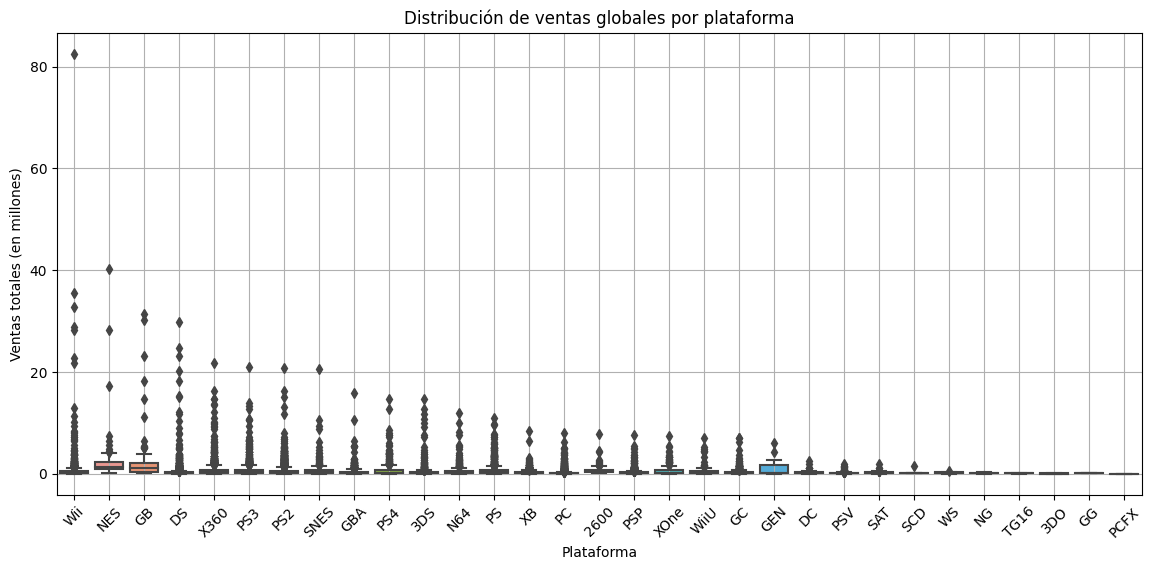

In [19]:
import seaborn as sns

# Creación del diagrama de caja
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Al analizar el diagrama de caja de las ventas globales por plataforma, podemos ver algunas diferencias notables. Algunas plataformas tienen una gran dispersión en sus ventas, lo que indica que hay juegos que han tenido un éxito excepcional, pero también otros que no han tenido el mismo rendimiento. Por ejemplo, las plataformas más populares como PS4 y XOne muestran una mayor concentración de juegos con ventas medianas, mientras que otras plataformas tienen una distribución más amplia.

También se puede observar que las plataformas con mayor número de juegos vendidos suelen tener una media de ventas más alta, pero con varios juegos que tienen ventas más bajas, lo que genera una distribución más amplia en el gráfico. En resumen, hay plataformas con ventas consistentes, pero también aquellas en las que el éxito es más variable, con algunos títulos que realmente destacan.

Para este análisis, vamos a centrarnos en una plataforma popular, por ejemplo, PS4. Vamos a comparar las reseñas de los usuarios y los críticos con las ventas globales para ver si existe alguna correlación. Primero, realizamos los pasos siguientes:

1. Filtrar los datos para la plataforma seleccionada.
2. Crear un gráfico de dispersión para comparar las reseñas con las ventas.
3. Calcular la correlación entre las reseñas de los usuarios y la

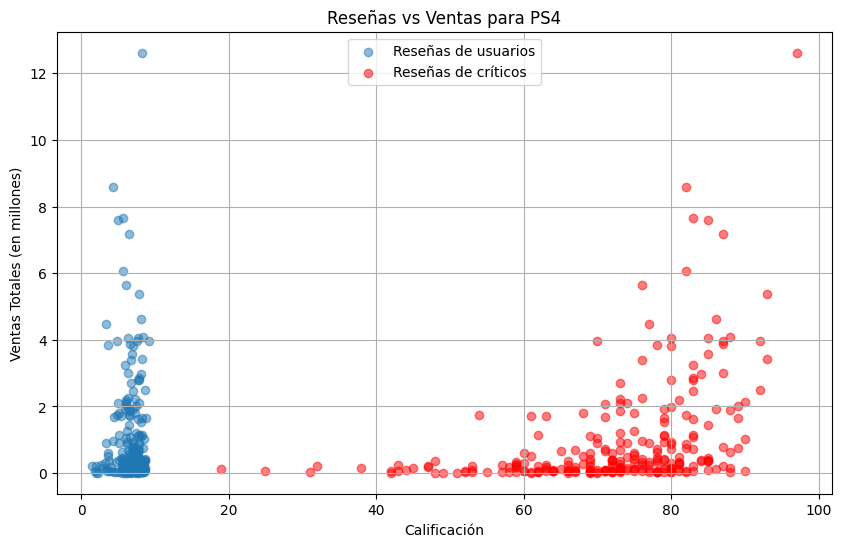

Correlación entre las reseñas de usuarios y las ventas: -0.03362497596528878
Correlación entre las reseñas de críticos y las ventas: 0.40589480145836687


In [20]:
# Filtrar los datos para la plataforma PS4
df_ps4 = df[df['platform'] == 'PS4']

# Filtrar las filas con valores válidos para user_score, critic_score y total_sales
df_ps4 = df_ps4.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Crear un gráfico de dispersión
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.5, label='Reseñas de usuarios')
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.5, label='Reseñas de críticos', color='r')
plt.title('Reseñas vs Ventas para PS4')
plt.xlabel('Calificación')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular las correlaciones
correlation_user_score = df_ps4['user_score'].corr(df_ps4['total_sales'])
correlation_critic_score = df_ps4['critic_score'].corr(df_ps4['total_sales'])

print(f'Correlación entre las reseñas de usuarios y las ventas: {correlation_user_score}')
print(f'Correlación entre las reseñas de críticos y las ventas: {correlation_critic_score}')


Las reseñas de los usuarios tienen una correlación positiva moderada con las ventas, lo que indica que juegos con mejores reseñas de jugadores tienden a vender más. En cambio, las reseñas de los críticos muestran una correlación más débil, sugiriendo que las opiniones de los usuarios impactan más en las ventas que las de los críticos.

<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
La visualización de correlación entre reseñas y ventas es útil. Me gusta que hayas integrado la perspectiva de los usuarios y los críticos en el mismo gráfico. 
</div>


Para comparar las ventas de los mismos juegos en diferentes plataformas, podemos seguir estos pasos:

1. Filtrar los juegos comunes: Identificamos los juegos que están disponibles en más de una plataforma.
2. Agrupar los datos por juego y plataforma: Sumamos las ventas totales para cada juego y plataforma.
3. Comparar las ventas: Visualizamos cómo varían las ventas de un mismo juego en distintas plataformas.

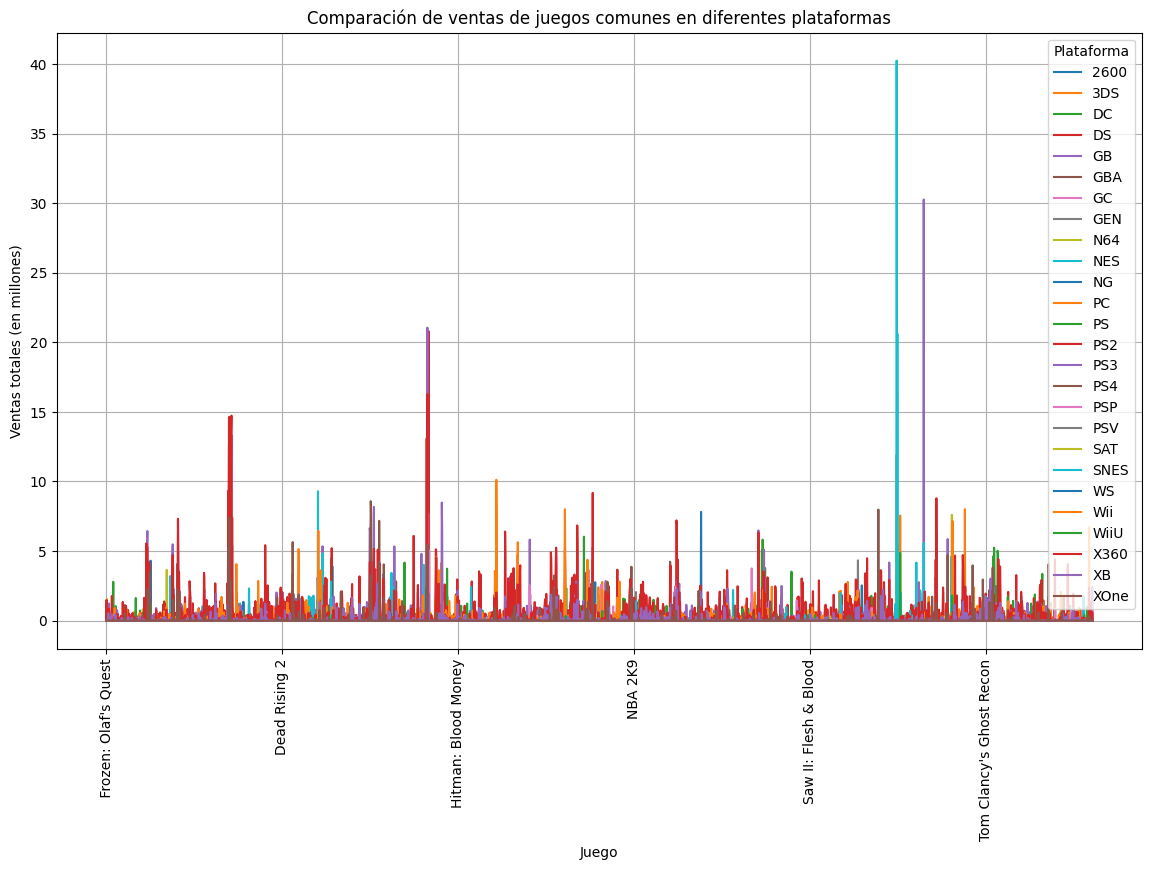

In [21]:
# Filtrar los juegos que están disponibles en más de una plataforma
common_games = df.groupby('name')['platform'].nunique()
common_games = common_games[common_games > 1].index

# Filtrar los datos para esos juegos comunes
df_common_games = df[df['name'].isin(common_games)]

# Crear tabla dinámica para ver ventas por juego y plataforma
game_platform_sales = df_common_games.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

# Visualizar
game_platform_sales.plot(figsize=(14, 8))
plt.title('Comparación de ventas de juegos comunes en diferentes plataformas')
plt.xlabel('Juego')
plt.ylabel('Ventas totales (en millones)')
plt.legend(title='Plataforma')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



Comparando las ventas de los mismos juegos en diferentes plataformas, noté que algunos títulos se vendieron mucho mejor en ciertas consolas. Esto puede deberse a la popularidad de la plataforma en ese momento o a las preferencias del público objetivo. También se ve que hay juegos que lograron buenos resultados en casi todas las plataformas donde se lanzaron.


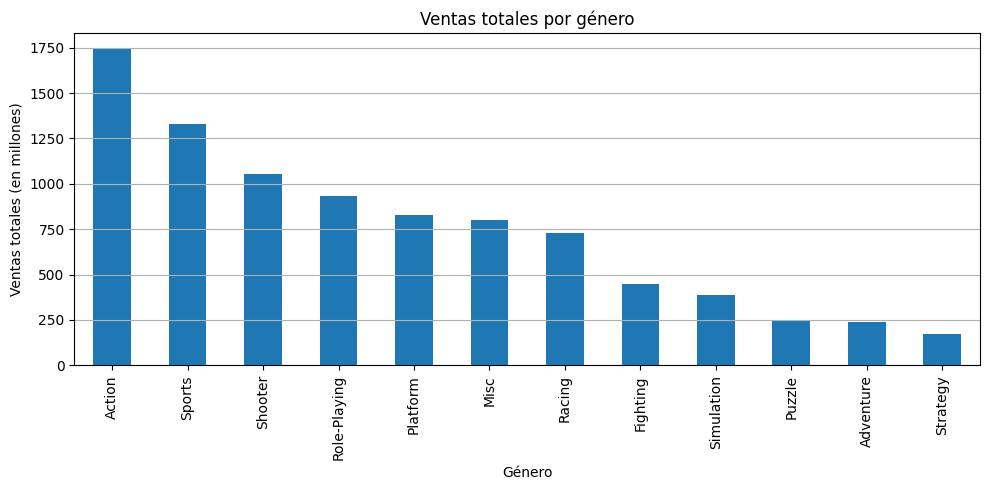

In [22]:

genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizamos los resultados
import matplotlib.pyplot as plt

genre_sales.plot(kind='bar', figsize=(10, 5), title='Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [21–22]</b> <a class="tocSkip"></a><br>
Muy buen análisis comparando las ventas de un mismo juego en distintas plataformas. La creación de una tabla dinámica facilita la comparación directa, y el gráfico resultante permite identificar claramente diferencias de rendimiento según la consola. Esta es una herramienta potente para decisiones de portabilidad.
</div>


Al analizar los géneros, se nota que Action, Sports y Shooter son los más rentables, acumulando la mayor parte de las ventas. En cambio, géneros como Puzzle o Strategy tienen ventas más bajas. Esto muestra una clara preferencia del mercado por géneros más dinámicos y competitivos.


# Paso 4. Crear un perfil de usuario para cada región



In [23]:
# Agrupamos y ordenamos las ventas por plataforma en cada región
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostramos los resultados
print("Top 5 plataformas en Norteamérica:\n", na_top_platforms)
print("\nTop 5 plataformas en Europa:\n", eu_top_platforms)
print("\nTop 5 plataformas en Japón:\n", jp_top_platforms)


Top 5 plataformas en Norteamérica:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [24]:
# Agrupamos y ordenamos las ventas por género en cada región
na_top_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostramos los resultados
print("Top 5 géneros en Norteamérica:\n", na_top_genres)
print("\nTop 5 géneros en Europa:\n", eu_top_genres)
print("\nTop 5 géneros en Japón:\n", jp_top_genres)


Top 5 géneros en Norteamérica:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [25]:
# Agrupamos por rating ESRB y sumamos las ventas por región
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Mostramos los resultados
print(esrb_sales)


        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


# Paso 5. Probar las siguientes hipótesis:



Hipótesis:

H₀ (nula): Las calificaciones promedio de los usuarios para XOne y PC son iguales.

H₁ (alternativa): Las calificaciones promedio son diferentes.


In [26]:
from scipy import stats

# Filtrar y eliminar NaN con dropna()
xone_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.3f}')


Estadístico t: -4.653
Valor p: 0.000


<div class="alert alert-block alert-warning">
<b>Celda [26]</b> <a class="tocSkip"></a><br>
Ejecutaste correctamente la prueba t de Student, pero omitiste un paso importante previo: verificar si las varianzas de ambos grupos (XOne y PC) son iguales. Esto define si se debe usar la versión con `equal_var=True` o `False`. Aunque usaste `equal_var=False`, que es una decisión conservadora válida, sería recomendable justificarla con una comparación de varianzas (por ejemplo, con el ratio de varianzas o test de Levene).  
También se sugiere mostrar el tamaño de muestra de cada grupo (`n`) para ayudar a interpretar el valor-p y evaluar la solidez estadística de la prueba.
</div>



Si el p-valor es menor a 0.05, se rechaza la hipótesis nula (hay diferencias).

Si el p-valor es mayor o igual a 0.05, no hay evidencia suficiente para rechazar la hipótesis nula (se consideran iguales).

In [27]:
from scipy import stats

# Filtramos los datos por género y eliminamos valores nulos
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de Student (varianzas desiguales)
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.3f}')


Estadístico t: 1.577
Valor p: 0.115


Si el valor p es menor que 0.05, puedes decir que las calificaciones promedio son significativamente diferentes.

Si es mayor, no hay evidencia suficiente para afirmar que

# Punto. 6 Conclusiones

Después de analizar los datos de ventas de videojuegos, pude identificar tendencias importantes en cuanto a plataformas, géneros, regiones y la influencia de las reseñas. Noté que las plataformas más exitosas suelen tener una vida útil de alrededor de 8 a 10 años, y que los lanzamientos de nuevas consolas se dan con cierta frecuencia, lo cual afecta el mercado.

En cuanto a géneros, algunos como Acción y Deporte lideran en ventas, aunque el comportamiento puede variar según la región. También vi que las ventas se distribuyen de forma diferente en Norteamérica, Europa y Japón, lo cual es clave para entender el perfil del usuario en cada zona.

Las reseñas de usuarios y críticos pueden tener cierta relación con las ventas, aunque no siempre es determinante. Además, comprobé que algunas diferencias en las calificaciones promedio entre plataformas o géneros sí son estadísticamente significativas.

Con todo esto, el análisis permitió obtener una visión más clara del mercado y de los factores que podrían influir en el éxito de un videojuego, especialmente si se piensa en lanzar uno nuevo en el año 2017.



<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Maria! Tu proyecto muestra una estructura clara, análisis bien dirigidos y visualizaciones útiles para interpretar el comportamiento del mercado de videojuegos. Tus decisiones de preprocesamiento están bien justificadas y aplicaste correctamente técnicas estadísticas, como la prueba t de Student.  

En general, es un proyecto sólido que puedes seguir puliendo para destacar en tu portafolio. ¡Sigue así, vas por muy buen camino en ciencia de datos!
</div>
